# Codes for manipulating files of datasets

### sepreate image under ethnic

In [1]:
import os
from shutil import copyfile

utkface_folder_path = '/data/lab/data/UTKFace'

# Create a function to extract race/ethnicity from the filename
def extract_ethnicity_from_filename(filename):
    parts = filename.split('_')
    ethnicity_part = parts[2]  # Assuming ethnicity is in the third position
    
    # Try to extract the ethnicity, and if it fails (due to unexpected format), skip the file
    try:
        ethnicity = int(ethnicity_part.split('.')[0])
        return ethnicity
    except (ValueError, IndexError):
        return None  # Return None for files with unexpected formats

# Iterate through the UTKFace folder
for root, dirs, files in os.walk(utkface_folder_path):
    for file in files:
        if file.endswith('.jpg'):  # Assuming images are JPG files
            file_path = os.path.join(root, file)
            
            # Extract ethnicity from the filename
            ethnicity = extract_ethnicity_from_filename(file)
            
            # Skip processing if ethnicity extraction fails (returns None)
            if ethnicity is None:
                print(f"Skipped: {file_path} - Unexpected filename format")
                continue
            
            # Proceed with processing for files with valid ethnicity information
            ethnicity_folder = os.path.join(utkface_folder_path, f'ethnicity_{ethnicity}')
            
            # Create the ethnicity folder if it doesn't exist
            if not os.path.exists(ethnicity_folder):
                os.makedirs(ethnicity_folder)
            
            # Move the file to the corresponding ethnicity folder
            destination = os.path.join(ethnicity_folder, file)
            copyfile(file_path, destination)

### sepreate image under age

In [2]:
import os
from shutil import copyfile

utkface_folder_path = '/data/lab/data/UTKFace_folded/ethnicity_balanced'

# Create a function to extract age from the filename
def extract_age_from_filename(filename):
    parts = filename.split('_')
    ethnicity_part = parts[0]  # Assuming ethnicity is in the third position
    
    # Try to extract the ethnicity, and if it fails (due to unexpected format), skip the file
    try:
        ethnicity = int(ethnicity_part.split('.')[0])
        return ethnicity
    except (ValueError, IndexError):
        return None  # Return None for files with unexpected formats

# Iterate through the UTKFace folder
for root, dirs, files in os.walk(utkface_folder_path):
    for file in files:
        if file.endswith('.jpg'):  # Assuming images are JPG files
            file_path = os.path.join(root, file)
            
            # Extract age from the filename
            age = extract_age_from_filename(file)
            
            # Skip processing if age extraction fails (returns None)
            if age is None:
                print(f"Skipped: {file_path} - Unexpected filename format")
                continue
            
            # Proceed with processing for files with valid age information
            age_folder = os.path.join(utkface_folder_path, f'{age}')
            
            # Create the age folder if it doesn't exist
            if not os.path.exists(age_folder):
                os.makedirs(age_folder)
            
            # Move the file to the corresponding age folder
            destination = os.path.join(age_folder, file)
            copyfile(file_path, destination)


### balancing the ethnic on the dataset

In [3]:
import os
import random
import shutil

# Set the paths to your folders
folder_paths = {
    'ethnicity_0': '/data/lab/data/UTKFace_folded/ethnicity_0',
    'ethnicity_1': '/data/lab/data/UTKFace_folded/ethnicity_1',
    'ethnicity_2': '/data/lab/data/UTKFace_folded/ethnicity_2',
    'ethnicity_3': '/data/lab/data/UTKFace_folded/ethnicity_3'
}

# Create a new folder to store the balanced dataset
balanced_folder = '/data/lab/data/UTKFace_folded/ethnicity_balanced'
os.makedirs(balanced_folder, exist_ok=True)

# Number of images to pick from each folder
num_images_per_group = 3000

for ethnicity, folder_path in folder_paths.items():
    # List all files in the current ethnicity folder
    files = os.listdir(folder_path)
    # Shuffle the files to randomly select
    random.shuffle(files)
    # Select the first num_images_per_group files
    selected_files = files[:num_images_per_group]

    # Create a new folder for the current ethnicity in the balanced dataset folder
    new_ethnicity_folder = balanced_folder
    os.makedirs(new_ethnicity_folder, exist_ok=True)

    # Copy the selected files to the new folder (skipping directories)
    for file_name in selected_files:
        file_path = os.path.join(folder_path, file_name)
        # Check if the current item is a file
        if os.path.isfile(file_path):
            shutil.copy(file_path, new_ethnicity_folder)


# Codes for plot

### plot the Comparison of Clip-ViT-B/16, RESNET18(trained), and Clip-RN50 Zero-shot Performance

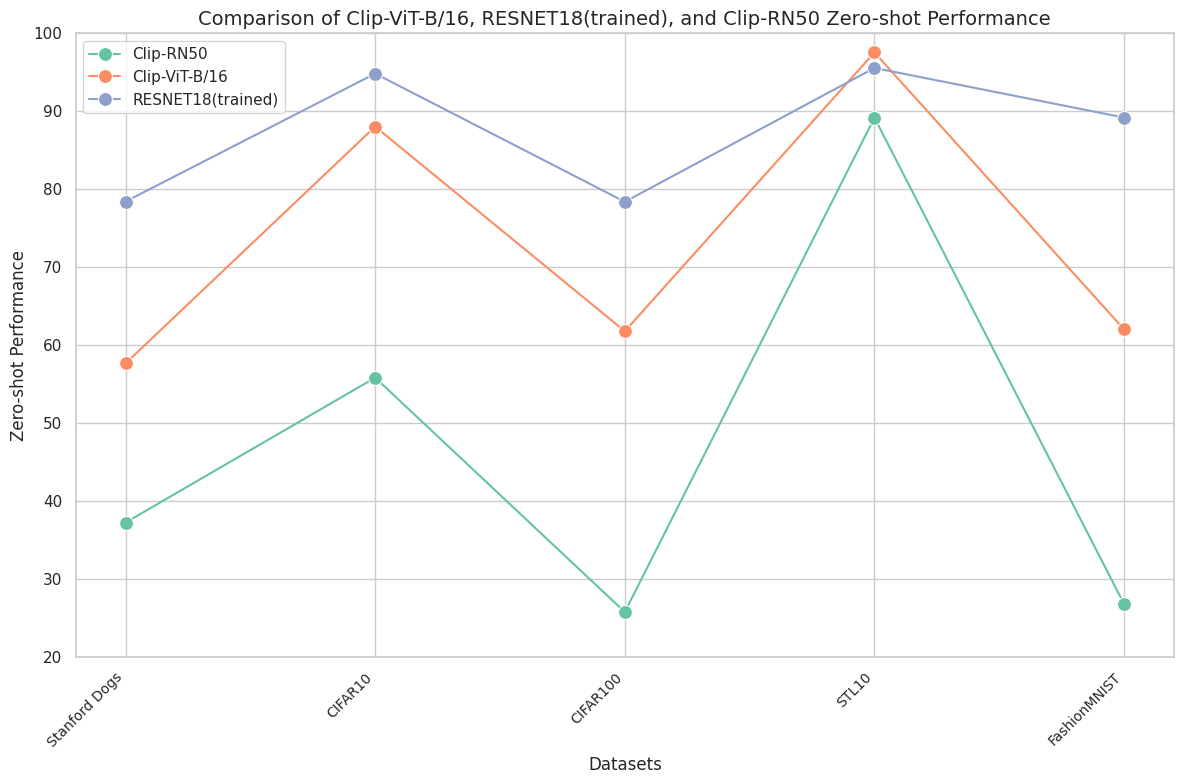

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Existing data for zero-shot performance of Clip and ResNet models
clip_datasets = {
    'CIFAR100': 61.80,
    'CIFAR10': 88.04,
    'STL10': 97.55,
    'Stanford Dogs': 57.68,
    'FashionMNIST': 62.04
}

resnet_datasets = {
    "Stanford Dogs": 78.43,
    "CIFAR10": 94.84,
    "CIFAR100": 78.40,
    "STL10": 95.56,
    "FashionMNIST": 89.20
}

clip_zeroshot = [clip_datasets.get(dataset, None) for dataset in resnet_datasets.keys()]
resnet_zeroshot = list(resnet_datasets.values())

clipRN50_datasets = {
    'Stanford Dogs': 37.27,
    'CIFAR10': 55.85,
    'CIFAR100': 25.80,
    'STL10': 89.18,
    'FashionMNIST': 26.82
}

clipRN50_zeroshot = [clipRN50_datasets.get(dataset, None) for dataset in resnet_datasets.keys()]

data = pd.DataFrame({
    'Datasets': list(resnet_datasets.keys()) * 3,
    'Zero-shot Performance': clipRN50_zeroshot + clip_zeroshot + resnet_zeroshot,
    'Model': ['Clip-RN50'] * len(resnet_datasets) + ['Clip-ViT-B/16'] * len(resnet_datasets) + ['RESNET18(trained)'] * len(resnet_datasets)
})

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', palette='Set2')

sns.lineplot(data=data, x='Datasets', y='Zero-shot Performance', hue='Model', marker='o', markersize=10)

plt.title('Comparison of Clip-ViT-B/16, RESNET18(trained), and Clip-RN50 Zero-shot Performance', fontsize=14)
plt.xlabel('Datasets', fontsize=12)
plt.ylabel('Zero-shot Performance', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=11)
plt.ylim(20, 100)
plt.tight_layout()

plt.savefig('Clip_vs_RESNET_clipRN50_seaborn_enhanced.png', bbox_inches='tight', dpi=300)
plt.show()


### plot the Zero-shot Performance by Ethnicity Clip
----

/tmp/ipykernel_131545/3001895357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ethnicities, y=zero_shot_performance, palette=colors)


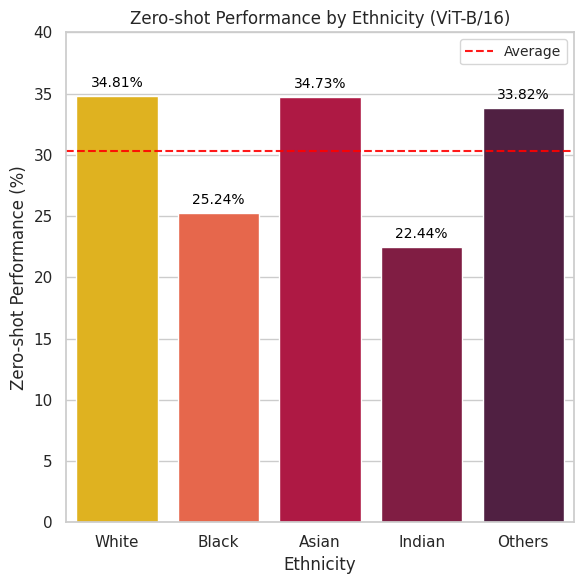

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for zero-shot performance across ethnicities
ethnicities = ['White', 'Black', 'Asian', 'Indian', 'Others']
zero_shot_performance = [34.81, 25.24, 34.73, 22.44, 33.82]  # Replace with actual values

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

# Changing the color palette to a different one
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']
ax = sns.barplot(x=ethnicities, y=zero_shot_performance, palette=colors)

plt.title('Zero-shot Performance by Ethnicity (ViT-B/16)', fontsize=12)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Zero-shot Performance (%)', fontsize=12)
plt.ylim(0, 40)

# Annotating the bars with their values
for i, value in enumerate(zero_shot_performance):
    ax.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# Adding a horizontal line for average performance
plt.axhline(y=30.34, color='red', linestyle='--', label='Average', alpha=0.9)

# Customizing the legend
plt.legend(loc='upper right', fontsize=10)

plt.savefig('Ethnic_compare.png',dpi=300)
plt.tight_layout()
plt.show()


### plot the Zero-shot Performance by Ethnicity RESNET
----

/tmp/ipykernel_131545/1380373310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ethnicities, y=zero_shot_performance, palette=colors)


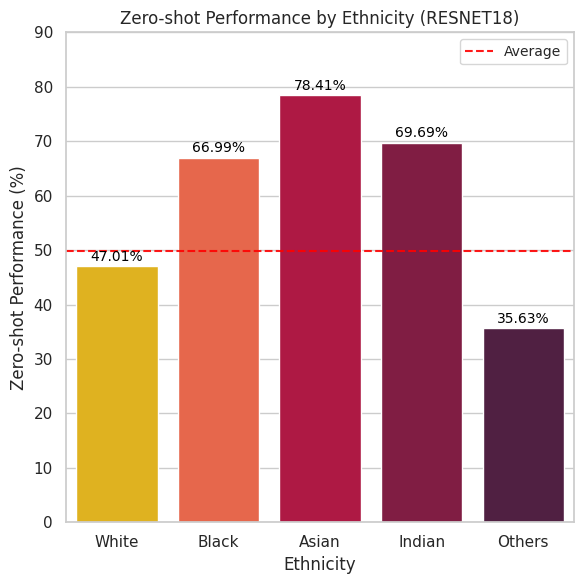

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for zero-shot performance across ethnicities
ethnicities = ['White', 'Black', 'Asian', 'Indian', 'Others']
zero_shot_performance = [47.01, 66.99, 78.41, 69.69, 35.63]  # Replace with actual values

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

# Changing the color palette to a different one
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']
ax = sns.barplot(x=ethnicities, y=zero_shot_performance, palette=colors)

plt.title('Zero-shot Performance by Ethnicity (RESNET18)', fontsize=12)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Zero-shot Performance (%)', fontsize=12)
plt.ylim(0, 90)

# Annotating the bars with their values
for i, value in enumerate(zero_shot_performance):
    ax.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# Adding a horizontal line for average performance
plt.axhline(y=49.75, color='red', linestyle='--', label='Average', alpha=0.9)

# Customizing the legend
plt.legend(loc='upper right', fontsize=10)

plt.savefig('Ethnic_compare_RESNET18.png',dpi=300)
plt.tight_layout()
plt.show()


### plot the specific Zero-shot Performance by Ethnicity
----

/tmp/ipykernel_131545/2612796997.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=selected_ethnicities, y=selected_performance, palette=colors[:2])  # Using colors for 'White' and 'Indian'


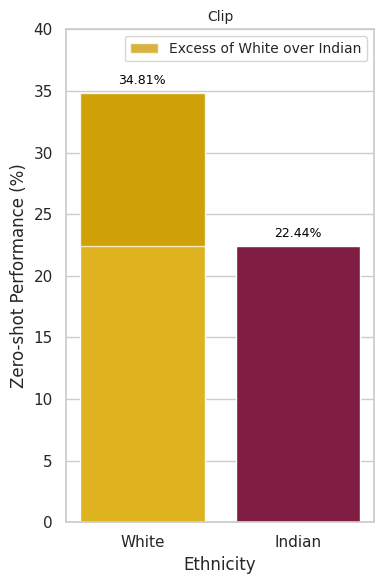

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'selected_ethnicities' and 'selected_performance' contain the data for 'White' and 'Indian'
selected_ethnicities = ['White', 'Indian']
selected_performance = [34.81, 22.44]  # Replace with actual values for 'White' and 'Indian'

# Define colors for 'White', 'Indian', and a darker shade of '#FFC300' for emphasis
colors = ['#FFC300', '#900C3F', '#CC9A00']

plt.figure(figsize=(4, 6))
ax = sns.barplot(x=selected_ethnicities, y=selected_performance, palette=colors[:2])  # Using colors for 'White' and 'Indian'

plt.title('Clip', fontsize=10)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Zero-shot Performance (%)', fontsize=12)
plt.ylim(0, 40)

# Annotating the bars with their values
for i, value in enumerate(selected_performance):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=9)

# Calculate the difference between 'White' and 'Indian'
difference = selected_performance[0] - selected_performance[1]

# Highlighting the portion of 'White' that exceeds 'Indian'
white_bar = ax.bar(selected_ethnicities.index('White'), difference, bottom=selected_performance[1], color='#CC9A00', alpha=0.75)

# Customizing the legend
plt.legend((white_bar[0],), ('Excess of White over Indian',), loc='upper right', fontsize=10)

plt.tight_layout()

# Saving the comparison plot as White_vs_Indian.png
plt.savefig('White_vs_Indian.png', dpi=300)

plt.show()


/tmp/ipykernel_131545/248282047.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=selected_ethnicities, y=selected_performance, palette=colors[:2])  # Using colors for 'White' and 'Indian'


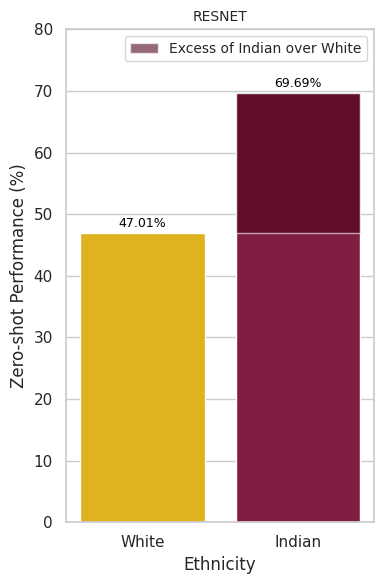

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'selected_ethnicities' and 'selected_performance' contain the data for 'White' and 'Indian'
selected_ethnicities = ['White', 'Indian']
selected_performance = [47.01, 69.69]  # Replace with actual values for 'White' and 'Indian'

# Define colors for 'White', 'Indian', and a darker shade of '#FFC300' for emphasis
colors = ['#FFC300', '#900C3F', '#CC9A00']

plt.figure(figsize=(4, 6))
ax = sns.barplot(x=selected_ethnicities, y=selected_performance, palette=colors[:2])  # Using colors for 'White' and 'Indian'

plt.title('RESNET', fontsize=10)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Zero-shot Performance (%)', fontsize=12)
plt.ylim(0, 80)

# Annotating the bars with their values
for i, value in enumerate(selected_performance):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=9)

# Calculate the difference between 'White' and 'Indian'
difference = selected_performance[0] - selected_performance[1]

# Highlighting the portion of 'White' that exceeds 'Indian'
white_bar = ax.bar(selected_ethnicities.index('Indian'), difference, bottom=selected_performance[1], color='#4E051A', alpha=0.6)

# Customizing the legend
plt.legend((white_bar[0],), ('Excess of Indian over White',), loc='upper right', fontsize=10)

plt.tight_layout()

# Saving the comparison plot as White_vs_Indian.png
plt.savefig('White_vs_Indian_RESNET.png', dpi=300)

plt.show()
